<a href="https://colab.research.google.com/github/Captmoonshot/DS-Unit-2-Sprint-3-Advanced-Regression/blob/master/Sammy%20Lee%20-%20DS_Unit_2_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 2 Sprint Challenge 3

## Logistic Regression and Beyond

In this sprint challenge you will fit a logistic regression modeling the probability of an adult having an income above 50K. The dataset is available at UCI:

https://archive.ics.uci.edu/ml/datasets/adult

Your goal is to:

1. Load, validate, and clean/prepare the data.
2. Fit a logistic regression model
3. Answer questions based on the results (as well as a few extra questions about the other modules)

Don't let the perfect be the enemy of the good! Manage your time, and make sure to get to all parts. If you get stuck wrestling with the data, simplify it (if necessary, drop features or rows) so you're able to move on. If you have time at the end, you can go back and try to fix/improve.

### Hints

It has a variety of features - some are continuous, but many are categorical. You may find [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) (a method to one-hot encode) helpful!

The features have dramatically different ranges. You may find [sklearn.preprocessing.minmax_scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html#sklearn.preprocessing.minmax_scale) helpful!

## Part 1 - Load, validate, and prepare data

The data is available at: https://archive.ics.uci.edu/ml/datasets/adult

Load it, name the columns, and make sure that you've loaded the data successfully. Note that missing values for categorical variables can essentially be considered another category ("unknown"), and may not need to be dropped.

You should also prepare the data for logistic regression - one-hot encode categorical features as appropriate.

In [0]:
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
        'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [171]:
# TODO - your work!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None, index_col=False, names=names)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [172]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [173]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [174]:
df.shape

(32561, 15)

In [175]:
# Using pd.get_dummies to transfrom the DataFrame

df_dummies = pd.get_dummies(df)

df_dummies.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked',
       ...
       'native-country_ Scotland', 'native-country_ South', 'native-country_ Taiwan', 'native-country_ Thailand', 'native-country_ Trinadad&Tobago', 'native-country_ United-States', 'native-country_ Vietnam', 'native-country_ Yugoslavia', 'income_ <=50K', 'income_ >50K'], dtype='object', length=110)

In [176]:
df_dummies.dtypes

age                                           int64
fnlwgt                                        int64
education-num                                 int64
capital-gain                                  int64
capital-loss                                  int64
hours-per-week                                int64
workclass_ ?                                  uint8
workclass_ Federal-gov                        uint8
workclass_ Local-gov                          uint8
workclass_ Never-worked                       uint8
workclass_ Private                            uint8
workclass_ Self-emp-inc                       uint8
workclass_ Self-emp-not-inc                   uint8
workclass_ State-gov                          uint8
workclass_ Without-pay                        uint8
education_ 10th                               uint8
education_ 11th                               uint8
education_ 12th                               uint8
education_ 1st-4th                            uint8
education_ 5

## Part 2 - Fit and present a Logistic Regression

Your data should now be in a state to fit a logistic regression. Use scikit-learn, define your `X` (independent variable) and `y`, and fit a model.

Then, present results - display coefficients in as interpretible a way as you can (hint - scaling the numeric features will help, as it will at least make coefficients more comparable to each other). If you find it helpful for interpretation, you can also generate predictions for cases (like our 5 year old rich kid on the Titanic) or make visualizations - but the goal is your exploration to be able to answer the question, not any particular plot (i.e. don't worry about polishing it).

It is *optional* to use `train_test_split` or validate your model more generally - that is not the core focus for this week. So, it is suggested you focus on fitting a model first, and if you have time at the end you can do further validation.

In [177]:
df_dummies.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_ ?,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [178]:
# TODO - your work!
# Our target variable is "income_ >50K"

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df_dummies.loc[:, 'age':'native-country_ Yugoslavia'].values
y = df_dummies['income_ >50K'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Also fitting LogisticRegression for different values of C parameter which controls L2 Regularization
lr = LogisticRegression().fit(X_train_scaled, y_train)
lr10 = LogisticRegression(C=10).fit(X_train_scaled, y_train)
lr100 = LogisticRegression(C=100).fit(X_train_scaled, y_train)
lr01 = LogisticRegression(C=0.1).fit(X_train_scaled, y_train)
lr001 = LogisticRegression(C=0.01).fit(X_train_scaled, y_train)

print("\nLogisticRegression Train Set Score: {:.2f}".format(lr.score(X_train_scaled, y_train)))
print("LogisticRegression Test Set Score: {:.2f}".format(lr.score(X_test_scaled, y_test)))
print()
print("LogisticRegression (C=10) Train Set Score: {:.2f}".format(lr10.score(X_train_scaled, y_train)))
print("LogisticRegression (C=10) Test Set Score: {:.2f}".format(lr10.score(X_test_scaled, y_test)))
print()
print("LogisticRegression (C=100) Train Set Score: {:.2f}".format(lr100.score(X_train_scaled, y_train)))
print("LogisticRegression (C=100) Test Set Score: {:.2f}".format(lr100.score(X_test_scaled, y_test)))
print()
print("LogisticRegression (C=0.1) Train Set Score: {:.2f}".format(lr01.score(X_train_scaled, y_train)))
print("LogisticRegression (C=0.1) Test Set Score: {:.2f}".format(lr01.score(X_test_scaled, y_test)))
print()
print("LogisticRegression (C=00.1) Train Set Score: {:.2f}".format(lr001.score(X_train_scaled, y_train)))
print("LogisticRegression (C=00.1) Test Set Score: {:.2f}".format(lr001.score(X_test_scaled, y_test)))



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression Train Set Score: 0.85
LogisticRegression Test Set Score: 0.86

LogisticRegression (C=10) Train Set Score: 0.85
LogisticRegression (C=10) Test Set Score: 0.86

LogisticRegression (C=100) Train Set Score: 0.85
LogisticRegression (C=100) Test Set Score: 0.86

LogisticRegression (C=0.1) Train Set Score: 0.84
LogisticRegression (C=0.1) Test Set Score: 0.85

LogisticRegression (C=00.1) Train Set Score: 0.83
LogisticRegression (C=00.1) Test Set Score: 0.83


In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [180]:
# Features and coefficientes DataFrame

coefficients = pd.concat([pd.DataFrame(df_dummies.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coefficients

,0,0
0,age,1.839500
1,fnlwgt,0.971436
2,education-num,1.601503
3,capital-gain,16.118935
4,capital-loss,2.321065
5,hours-per-week,2.722326
6,workclass_ ?,-0.361920
7,workclass_ Federal-gov,0.402037
8,workclass_ Local-gov,-0.314797
9,workclass_ Never-worked,-0.189355


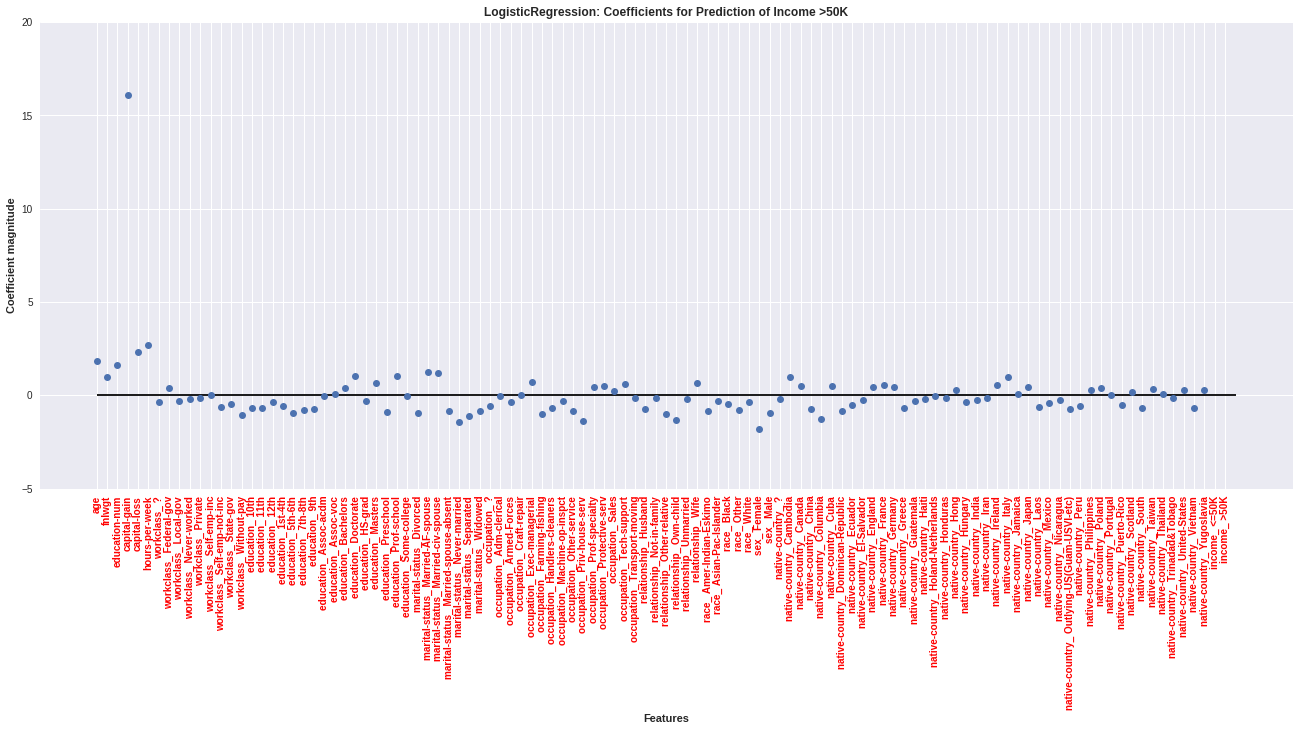

In [181]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.style.use('seaborn')


plt.plot(lr.coef_.T, 'o')
plt.xticks(range(df_dummies.shape[1]), df_dummies.columns, rotation=90, fontweight='bold',color='r')
plt.hlines(0, 0, df_dummies.shape[1])
plt.ylim(-5, 20)
plt.xlabel("Features", fontweight='bold')
plt.ylabel("Coefficient magnitude", fontweight='bold')
plt.title("LogisticRegression: Coefficients for Prediction of Income >50K", fontweight='bold');

## Part 3 - Analysis, Interpretation, and Questions

### Based on your above model, answer the following questions

1. What are 3 features positively correlated with income above 50k?
2. What are 3 features negatively correlated with income above 50k?
3. Overall, how well does the model explain the data and what insights do you derive from it?

*These answers count* - that is, make sure to spend some time on them, connecting to your analysis above. There is no single right answer, but as long as you support your reasoning with evidence you are on the right track.

Note - scikit-learn logistic regression does *not* automatically perform a hypothesis test on coefficients. That is OK - if you scale the data they are more comparable in weight.

### Match the following situation descriptions with the model most appropriate to addressing them

In addition to logistic regression, a number of other approaches were covered this week. Pair them with the situations they are most appropriate for, and briefly explain why.

Situations:
1. You are given data on academic performance of primary school students, and asked to fit a model to help predict "at-risk" students who are likely to receive the bottom tier of grades.
2. You are studying tech companies and their patterns in releasing new products, and would like to be able to model and predict when a new product is likely to be launched.
3. You are working on modeling expected plant size and yield with a laboratory that is able to capture fantastically detailed physical data about plants, but only of a few dozen plants at a time.

Approaches:
1. Ridge Regression
2. Quantile Regression
3. Survival Analysis

### Answers: Based on the Visualization of Coefficients
1.  Three features positively correlated with income >50K are:
CAPITAL GAIN, CAPITAL LOSS, AND HOURS-PER-WEEK THAT THEY WORKED.

2. Three features negatively correlated with income > 50K are: SEX_FEMALE, MARITAL STATUS NEVER MARRIED, AND OCCUPATION PRIV-HOUSE-SERV

3.  Overall, taking into account the number of samples and features, this Logistic Model does not do so well.  I tried fiddling around with the C regularization parameter going from .01 (High regularization) to 100 (Low regularization) and both training and testing accuracy scores remained constant around 86%.  Based on the coefficients, I would say the two most important factors for a person making over 50K are to work more hours or own financial assets where you can derive capital-gains from which goes hand-in-hand with common sense.

In [182]:
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [183]:
df_dummies['native-country_ Japan'].value_counts()

0    32499
1       62
Name: native-country_ Japan, dtype: int64

Also, the dummies for native country don't make for good predictors of income because it's **Imbalanced Data** (there's not enough samples in each category as the above value_counts() shows).  For example, Japan has one of the highest coefficients for Income > 50K, so we might be tempted to think that Japanese people have a tendency to make more money than people from other countries, but there's only 62 samples in the dataset who are Japanese, so the here the relatively high coefficient can be misleading. 

### Answers:

1.  For the "at-risk" student problem the appropriate model would be **Quantile Regression** in that it let's us first minimize least absolute deviation in the case of q=.5  And also it let's us fit a model for different quantiles.  So for the most at-risk students, perhaps in the quantile of 5%, we would only overestimate the paramters 5% of the time, and also let's us see if different coefficients are significant at different quantiles.  The Quantile Regression also helps models be more **robust**  against outliers since it uses the median for its calculations instead of the mean like OLS. 

2. For product-launch problem the appropriate model would be **Survival Analysis** because Survival Analysis let's us see how different risk factors effect the duration of time between one event ("start of product building") and another event ("product launch").  Using Survival Regression (Cox Proportional Hazards model) we can get an idea of how much more likely some event will happen based on risk factors.  I.e. **Person who received treatment A is 4x more likely to die (hazard risk) than person who received treatment B.**

3. For the expected plant size problem, the appropriate model would be **Ridge Regression**  since **Ridge seeks to minimize MSE (mean squared error) + lambda (penalty parameter or alpha) * slope^2.**  What this does it pushes all the coefficients of the fitted model towards zero with the result that a Ridge regression line is able to generalize better to unseen data.  So in situations where sample size is limited, the OLS can overfit the training data and perform horribly on the test data.  We would say the OLS has **Low Bias** and **High Variance**.  Whereas, the Ridge because it tends to flatten the line of best fit will tend to perform not so well on the training data, and better on the test data so **High Bias** and **Low Variance**.  This is most easily seen in the extreme case of trying to fit a line where we only have 2 points.  